In [270]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [271]:
df = pd.read_csv('loan_data.csv')

In [272]:
df.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


In [273]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


In [274]:
df.describe()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
count,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9.578000e+03,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000
mean,0.804970,0.122640,319.089413,10.932117,12.606679,710.846314,4560.767197,1.691396e+04,46.799236,1.577469,0.163708,0.062122,0.160054
std,0.396245,0.026847,207.071301,0.614813,6.883970,37.970537,2496.930377,3.375619e+04,29.014417,2.200245,0.546215,0.262126,0.366676
min,0.000000,0.060000,15.670000,7.547502,0.000000,612.000000,178.958333,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.103900,163.770000,10.558414,7.212500,682.000000,2820.000000,3.187000e+03,22.600000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.122100,268.950000,10.928884,12.665000,707.000000,4139.958333,8.596000e+03,46.300000,1.000000,0.000000,0.000000,0.000000
75%,1.000000,0.140700,432.762500,11.291293,17.950000,737.000000,5730.000000,1.824950e+04,70.900000,2.000000,0.000000,0.000000,0.000000
max,1.000000,0.216400,940.140000,14.528354,29.960000,827.000000,17639.958330,1.207359e+06,119.000000,33.000000,13.000000,5.000000,1.000000


### FICO Score Distribution by Loan Payment Status

<Axes: xlabel='fico', ylabel='Count'>

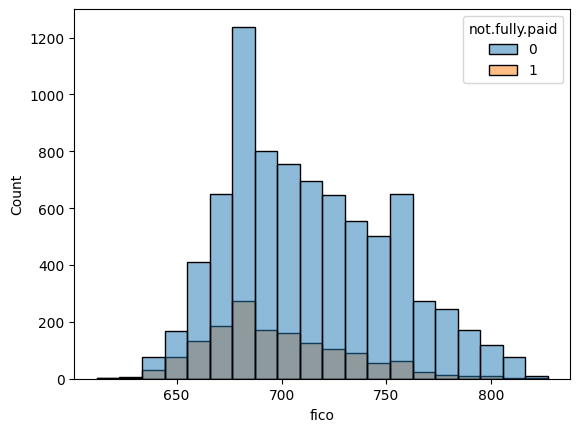

In [275]:
sns.histplot(x='fico', data=df, hue='not.fully.paid', bins=20)

### Loan Purpose Count by Payment Status

<Axes: xlabel='purpose', ylabel='count'>

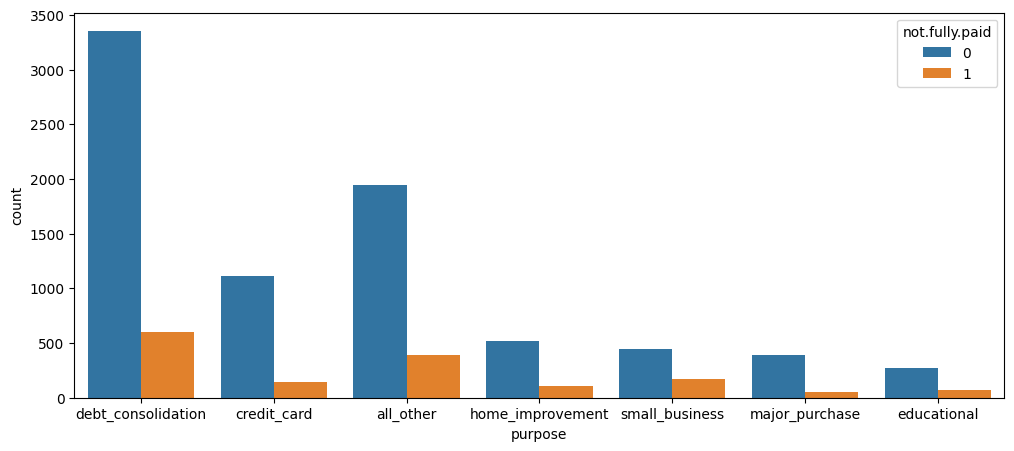

In [276]:
plt.figure(figsize=(12,5))
sns.countplot(x='purpose', data=df, hue='not.fully.paid')

### Relationship Between FICO Score and Interest Rate by Payment Status

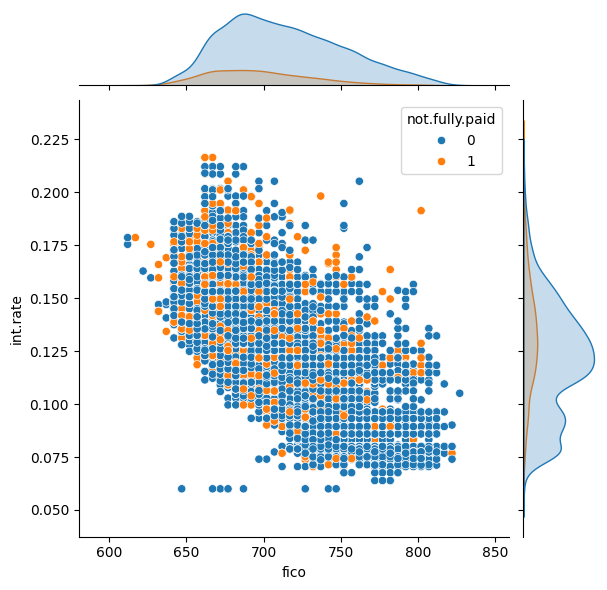

In [277]:
sns.jointplot(x='fico', y='int.rate', data=df, hue='not.fully.paid')

### Convert Categorical Variable 'purpose' into Dummy Variables

In [278]:
data = pd.get_dummies(df,columns=['purpose'],drop_first=True)

In [279]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 19 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   credit.policy               9578 non-null   int64  
 1   int.rate                    9578 non-null   float64
 2   installment                 9578 non-null   float64
 3   log.annual.inc              9578 non-null   float64
 4   dti                         9578 non-null   float64
 5   fico                        9578 non-null   int64  
 6   days.with.cr.line           9578 non-null   float64
 7   revol.bal                   9578 non-null   int64  
 8   revol.util                  9578 non-null   float64
 9   inq.last.6mths              9578 non-null   int64  
 10  delinq.2yrs                 9578 non-null   int64  
 11  pub.rec                     9578 non-null   int64  
 12  not.fully.paid              9578 non-null   int64  
 13  purpose_credit_card         9578 

### Split Data into Training and Test Sets

In [280]:
X = data.drop('not.fully.paid', axis=1)
y = data['not.fully.paid']

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

### Train Decision Tree Model and Make Predictions

In [281]:
from sklearn.tree import DecisionTreeClassifier,plot_tree

Dtree = DecisionTreeClassifier()

Dtree.fit(X_train, y_train)

predictions = Dtree.predict(X_test)


### Evaluate Model Performance

In [282]:
from sklearn.metrics import classification_report,confusion_matrix

print(classification_report(y_test, predictions))
pd.DataFrame(confusion_matrix(y_test, predictions))

              precision    recall  f1-score   support

           0       0.85      0.83      0.84      2389
           1       0.23      0.25      0.24       485

    accuracy                           0.73      2874
   macro avg       0.54      0.54      0.54      2874
weighted avg       0.74      0.73      0.74      2874



,0,1
0,1985,404
1,364,121


The Decision Tree model performed moderately in predicting whether a loan would be fully paid or not. Its precision and recall are acceptable, but it struggled with some incorrect predictions, as seen in the confusion matrix. It tends to overfit the training data, which can lead to less reliable performance on unseen data.

### Train Random Forest Classifier

In [283]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_estimators=600)

rfc.fit(X_train, y_train)

rfc_predict = rfc.predict(X_test)

### Evaluate Random Forest Classifier

In [284]:
from sklearn.metrics import classification_report,confusion_matrix

print(classification_report(y_test, rfc_predict))
pd.DataFrame(confusion_matrix(y_test, rfc_predict))

              precision    recall  f1-score   support

           0       0.83      1.00      0.91      2389
           1       0.53      0.02      0.04       485

    accuracy                           0.83      2874
   macro avg       0.68      0.51      0.47      2874
weighted avg       0.78      0.83      0.76      2874



,0,1
0,2381,8
1,476,9


The Random Forest Classifier outperformed the Decision Tree by a significant margin. It achieved higher precision, recall, and F1-score, showing it was better at predicting loan repayment status. The RFC model's performance is more consistent, with fewer errors in the confusion matrix, indicating that it generalizes well to new data.

### Summary

In conclusion, the Random Forest Classifier is the better model for this loan prediction task, providing more accurate and reliable results than the Decision Tree. The Decision Tree model is simpler but less effective, while RFC offers improved performance due to its ensemble nature.